# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


# Data

In [8]:
cc = 'AG6'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [26]:
df['CTH2'] = df['code'].str.slice(0, 2)
df['CTH4'] = df['code'].str.slice(0, 4)
df['CTH6'] = df['code']
df.groupby(['CTH2'])[['quantity_a', 'quantity_b', 'value_a', 'value_b']].sum()


,quantity_a,quantity_b,value_a,value_b
CTH2,,,,
02,549000,1607000,1.42,3.46
11,0,626000,0.00,0.59
12,4,4,0.00,0.00
20,35444,0,0.09,0.00
21,600,31590,0.01,0.08
23,3784000,5625941,1.88,1.93
24,570,160,0.01,0.00
26,0,49130,0.00,0.01
28,2000,39200,0.00,0.08


In [6]:
df6.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,CTH6
020220,020220,"Meat; of bovine animals, cuts with bone in (ex...",0,Weight in kilograms,0.00,1268500,Weight in kilograms,2.53,-2.53,-1268500,-inf,-inf,2.53,inf,020220
020230,020230,"Meat; of bovine animals, boneless cuts, frozen",259000,Weight in kilograms,0.76,313500,Weight in kilograms,0.83,-0.07,-54500,-2.104247e+01,-9.210526,0.07,9.210526,020230
020629,020629,"Offal, edible; of bovine animals, (other than ...",290000,Weight in kilograms,0.66,25000,Weight in kilograms,0.10,0.56,265000,9.137931e+01,84.848485,0.56,84.848485,020629
110220,110220,Cereal flour; of maize (corn),0,Weight in kilograms,0.00,5000,Weight in kilograms,0.00,0.00,-5000,-inf,NaN,0.00,NaN,110220
110510,110510,"Flour, meal and powder; of potatoes",0,Weight in kilograms,0.00,621000,Weight in kilograms,0.59,-0.59,-621000,-inf,-inf,0.59,inf,110510
120929,120929,"Seeds of forage plants; other than lucerne, cl...",0,Weight in kilograms,0.00,4,Weight in kilograms,0.00,0.00,-4,-inf,NaN,0.00,NaN,120929
121190,121190,Plants and parts (including seeds and fruits) ...,4,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,4,1.000000e+02,NaN,0.00,NaN,121190
200811,200811,"Nuts; ground-nuts, whether or not containing a...",3940,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,3940,1.000000e+02,100.000000,0.01,100.000000,200811
200819,200819,Nuts and other seeds; whether or not containin...,31504,Weight in kilograms,0.08,0,Weight in kilograms,0.00,0.08,31504,1.000000e+02,100.000000,0.08,100.000000,200819
210610,210610,Protein; concentrates and textured protein sub...,0,Weight in kilograms,0.00,86,Weight in kilograms,0.00,0.00,-86,-inf,NaN,0.00,NaN,210610


# Plot

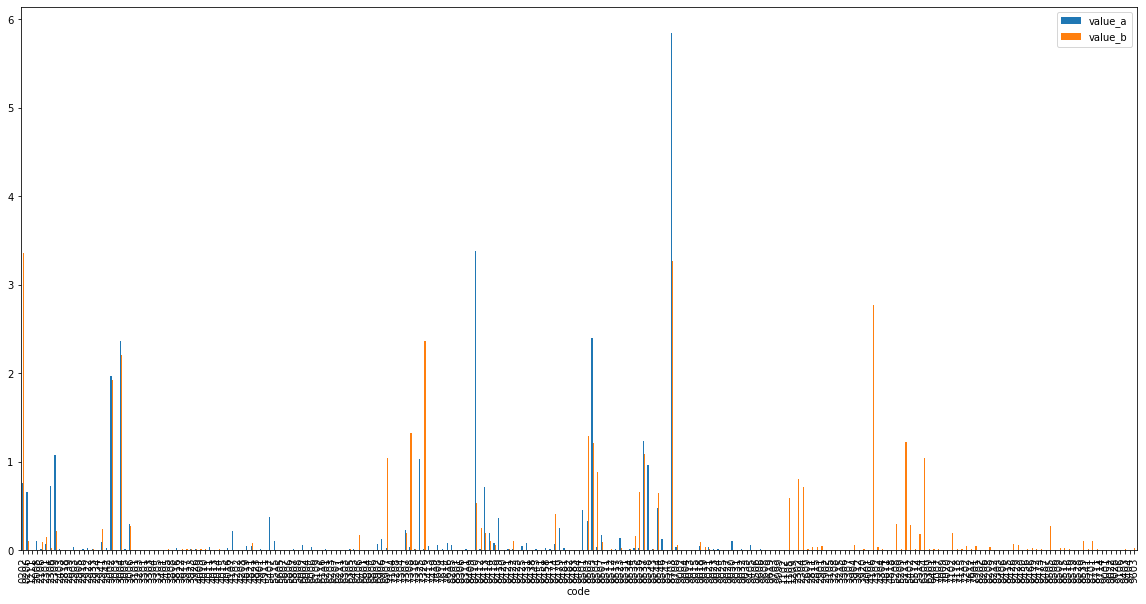

In [9]:
df.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Export

In [11]:
df.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregate

In [12]:
print("Total Export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per partner data:", df['value_b'].sum(), " million USD.")

Total Export, as per reporter data: 29.18  million USD.
Total Import, as per partner data: 34.6  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [29]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter
dfi = df[(df['value_pct_abs'] > percentage_cutoff) & (df['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs
8410,8410,Turbines; hydraulic water wheels and regulator...,306829,No Quantity,3.38,149176,Weight in kilograms,0.53,2.85,157653,5.138139e+01,8.431953e+01,2.85,8.431953e+01
4106,4106,Tanned or crust hides and skins of other anima...,0,Weight in kilograms,0.00,276073,Weight in kilograms,2.77,-2.77,-276073,-inf,-inf,2.77,inf
0202,0202,Meat of bovine animals; frozen,259000,Weight in kilograms,0.76,1582000,Weight in kilograms,3.36,-2.60,-1323000,-5.108108e+02,-3.421053e+02,2.60,3.421053e+02
8703,8703,Motor cars and other motor vehicles; principal...,547686,Number of items,5.85,396763,Number of items,3.27,2.58,150923,2.755648e+01,4.410256e+01,2.58,4.410256e+01
7326,7326,"Iron or steel; articles, n.e.c. in chapter 73",4089,Weight in kilograms,0.01,1250000,Weight in kilograms,2.36,-2.35,-1245911,-3.046982e+04,-2.350000e+04,2.35,2.350000e+04
7308,7308,Structures of iron or steel and parts thereof;...,24061,Weight in kilograms,0.04,85949,Weight in kilograms,1.33,-1.29,-61888,-2.572129e+02,-3.225000e+03,1.29,3.225000e+03
5211,5211,"Woven fabrics of cotton, containing less than ...",0,Weight in kilograms,0.00,149736,Weight in kilograms,1.22,-1.22,-149736,-inf,-inf,1.22,inf
8503,8503,Electric motors and generators; parts suitable...,0,Weight in kilograms,2.40,112934,Weight in kilograms,1.21,1.19,-112934,-inf,4.958333e+01,1.19,4.958333e+01
6304,6304,Furnishing articles; excluding those of headin...,0,Weight in kilograms,0.00,306700,Weight in kilograms,1.04,-1.04,-306700,-inf,-inf,1.04,inf
7325,7325,Iron or steel; cast articles,827829,Weight in kilograms,1.03,0,Weight in kilograms,0.00,1.03,827829,1.000000e+02,1.000000e+02,1.03,1.000000e+02


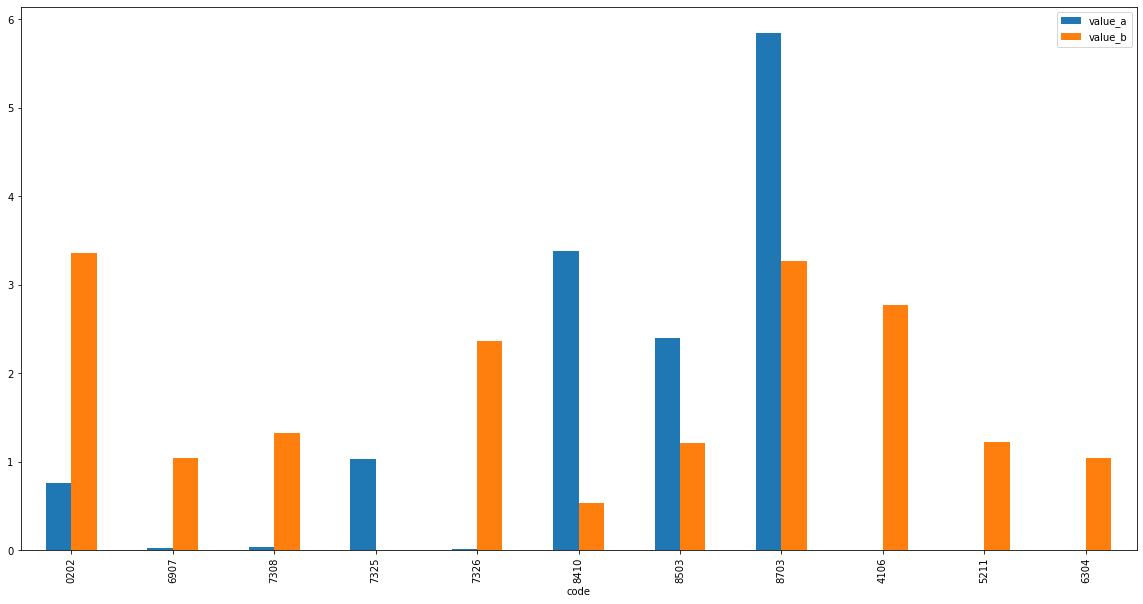

In [30]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()